In [216]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(1057, 2588)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

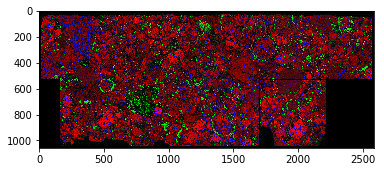

In [521]:
image_tiff = Image.open('/users/HyeYunPark/Downloads/els-sample1-8bt/Sem-t1-ps1B-MgSulAl.tif')
image_fe=Image.open('/users/HyeYunPark/Downloads/els-sample1-8bt/Sem-t1-ps1B_Fe.tif')
plt.imshow(image_tiff)
imarray=[]
imarray = np.array(image_tiff)
imarray_fe=[]
imarray_fe=np.array(image_fe)
print imarray_fe.shape
imarray=imarray[:,:,0]
imarray

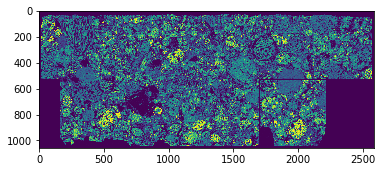

In [518]:
n = 10
l=256
im = imarray
plt.imshow(im)
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
binary_img=[]
binary_img = img>15 # > 0.5


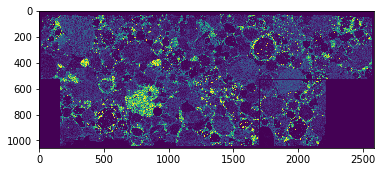

In [522]:
n = 10
l=256
im_fe = imarray_fe
plt.imshow(im_fe)
np.random.seed(1)
points = l*np.random.random((2, n**2))
im_fe[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im_fe = ndimage.gaussian_filter(im_fe, sigma=l/(4.*n))

mask_fe = (im_fe > im_fe.mean()).astype(np.float)
mask_fe += 0.1 * im_fe
img_fe = mask_fe + 0.2*np.random.randn(*mask_fe.shape)

hist_fe, bin_edges_fe = np.histogram(img_fe, bins=60)
bin_centers_fe = 0.5*(bin_edges_fe[:-1] + bin_edges_fe[1:])
binary_img_fe=[]
binary_img_fe = img_fe>15 # > 0.5


In [510]:
x,y=imarray.shape
print x,y


1057 2588


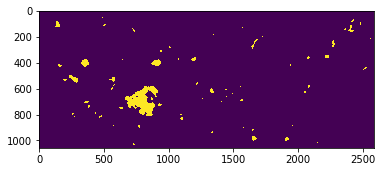

In [523]:
plt.imshow(binary_img_fe)

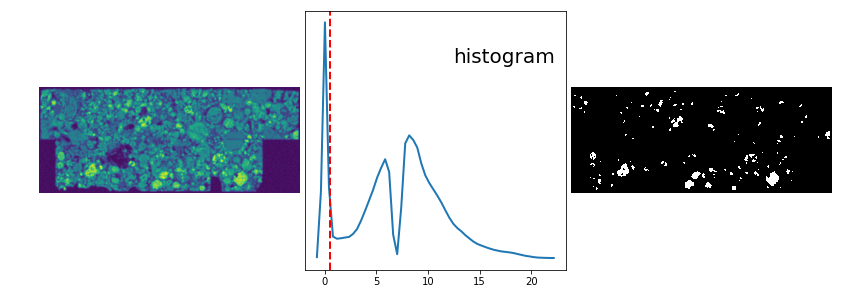

In [512]:
plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

In [524]:
open_img = ndimage.binary_opening(binary_img)
open_img_fe = ndimage.binary_opening(binary_img_fe)
close_img = ndimage.binary_closing(open_img)
close_img_fe = ndimage.binary_closing(open_img_fe)
#plt.imshow(binary_img)

In [514]:
mask = (im > im.mean()).astype(np.float)

img = mask + 0.3*np.random.randn(*mask.shape)

#binary_img = img > 10# 0.5

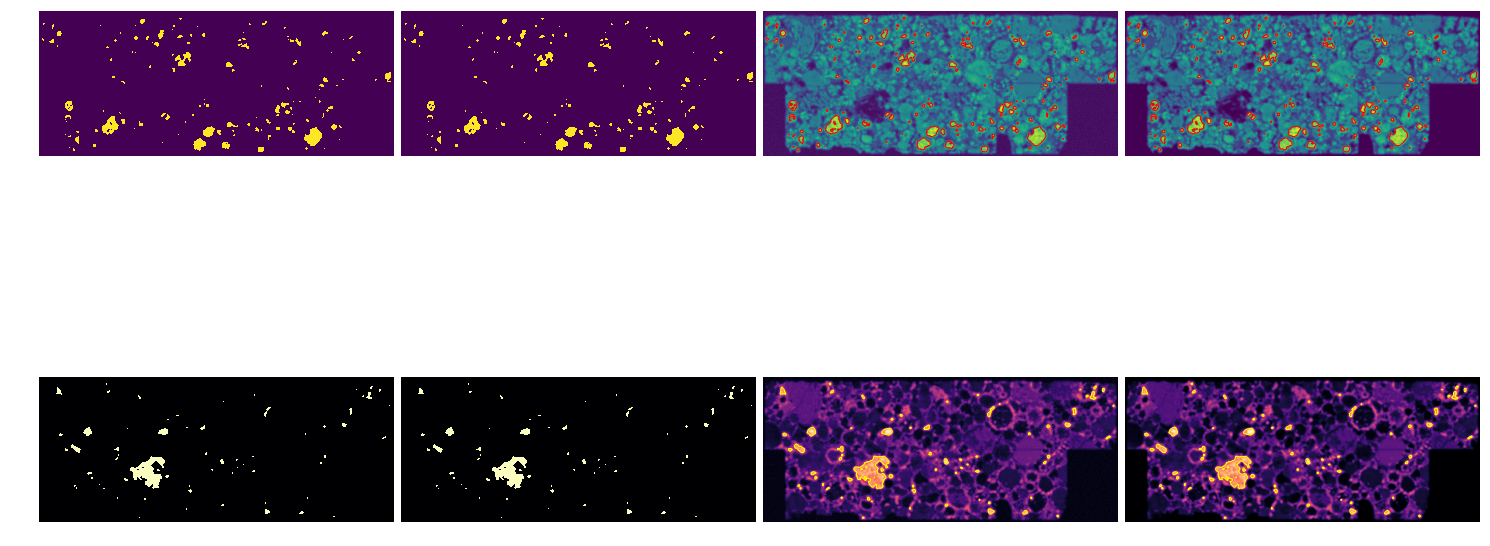

In [528]:
plt.figure(figsize=(20,10))
plt.subplot(241)
plt.imshow(binary_img[:x, :y], cmap=plt.cm.viridis)
plt.axis('off')
plt.subplot(242)
plt.imshow(open_img[:x, :y], cmap=plt.cm.viridis)
plt.axis('off')
plt.subplot(243)
plt.imshow(img[:x, :y], cmap=plt.cm.viridis)
plt.contour(close_img[:x, :y], [0.5], linewidths=1, colors='r')
plt.axis('off')
plt.subplot(244)
plt.imshow(mask[:x, :y], cmap=plt.cm.viridis)
plt.contour(close_img[:x, :y], [0.5], linewidths=1, colors='r')
plt.axis('off')

plt.subplot(245)
plt.imshow(binary_img_fe[:x, :y], cmap=plt.cm.magma)
plt.axis('off')
plt.subplot(246)
plt.imshow(open_img_fe[:x, :y], cmap=plt.cm.magma)
plt.axis('off')
plt.subplot(247)
plt.imshow(img_fe[:x, :y], cmap=plt.cm.magma)
plt.contour(close_img_fe[:x, :y], [0.5], linewidths=1, colors='yellow')
plt.axis('off')
plt.subplot(248)
plt.imshow(mask_fe[:x, :y], cmap=plt.cm.magma)
plt.contour(close_img_fe[:x, :y], [0.5], linewidths=1, colors='yellow')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

plt.show()

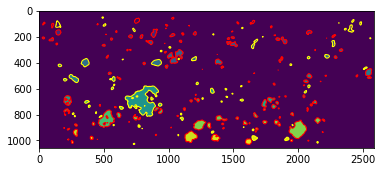

In [537]:
#plt.imshow(mask)
##plt.show()
label_im, nb_labels = ndimage.label(close_img+close_img_fe)
nb_labels # how many regions?
label_im_fe, nb_labels_fe = ndimage.label(close_img_fe)
plt.imshow(label_im)  
#plt.imshow(label_im_fe)
plt.contour(close_img[:x, :y], [0.5], linewidths=1, colors='r')
plt.contour(close_img_fe[:x, :y], [0.5], linewidths=1, colors='yellow')